In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import os
import pickle
from collections import Counter

In [2]:
# 분석할 데이터셋 목록
DATASETS = [
    "adult", "bank", "blood", "car", "communities", 
    "credit-g", "diabetes", "myocardial", "cleveland", 
    "hungarian", "switzerland", "heart_statlog", "heart"
]

In [5]:
def load_graph_data(dataset_name, graph_type="star_graph"):
    """그래프 데이터 로드"""
    base_path = "/mnt/storage/personal/eungyeop/dataset/graph"
    if graph_type == "fully_connected_graph":
        path = os.path.join(base_path, "fully_connected_graph", f"fully_connected_graph_{dataset_name}.pkl")
    else:
        path = os.path.join(base_path, "star_graph", f"star_graph_{dataset_name}.pkl")
    
    print(f"Loading from: {path}")  # 디버깅을 위한 경로 출력
    with open(path, 'rb') as f:
        return pickle.load(f)

def get_feature_names(dataset_name):
    """데이터셋의 feature names 로드"""
    base_path = "/home/eungyeop/LLM/tabular/ProtoLLM/dataset/data/table"
    df = pd.read_csv(os.path.join(base_path, f"{dataset_name}.csv"))
    return df.columns.tolist()

def visualize_graph_structure(data, dataset_name, graph_type):
    """그래프 구조 시각화 (few-shot 구분 없이)"""
    plt.figure(figsize=(12, 12))
    plt.title(f"{dataset_name} - {graph_type}")
    
    n_nodes = data.x.shape[0]
    angles = np.linspace(0, 2*np.pi, n_nodes-1, endpoint=False)
    
    pos = np.zeros((n_nodes, 2))
    pos[0] = [0, 0]
    radius = 1
    for i in range(1, n_nodes):
        pos[i] = [radius * np.cos(angles[i-1]), radius * np.sin(angles[i-1])]
    
    for i in range(data.edge_index.shape[1]):
        start = data.edge_index[0, i]
        end = data.edge_index[1, i]
        plt.plot([pos[start, 0], pos[end, 0]], 
                [pos[start, 1], pos[end, 1]], 
                'gray', alpha=0.5)
    
    plt.scatter(pos[0, 0], pos[0, 1], c='red', s=200, label='Center Node')
    plt.scatter(pos[1:, 0], pos[1:, 1], c='blue', s=200, label='Feature Nodes')
    
    features = get_feature_names(dataset_name)
    plt.annotate('Center', (pos[0, 0], pos[0, 1]))
    for i in range(1, n_nodes):
        plt.annotate(features[i-1], (pos[i, 0], pos[i, 1]))
    
    plt.legend()
    plt.axis('equal')
    plt.show()


==================== Analyzing adult dataset ====================

=== adult - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_adult.pkl


/home/eungyeop/anaconda3/envs/featllm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


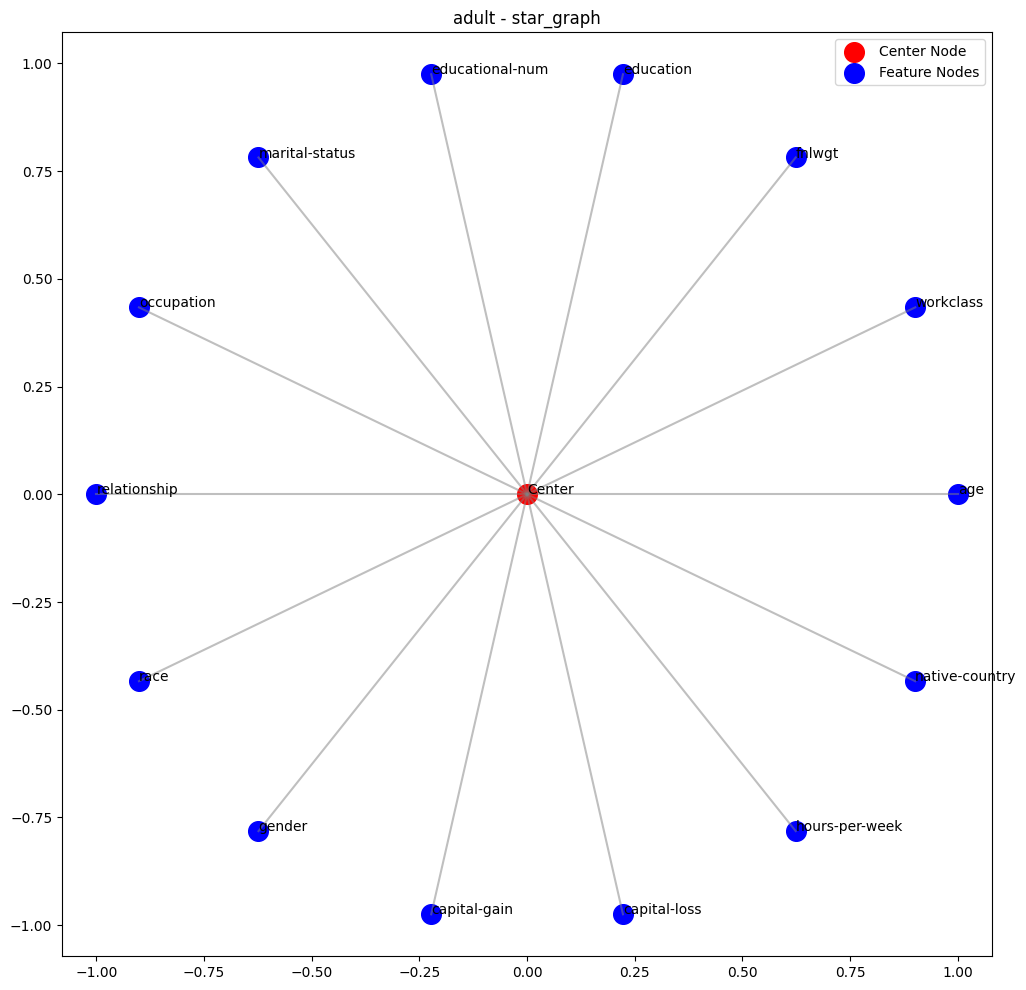


Total samples: 48842
Class distribution:
  Label 0: 37155 samples (76.07%)
  Label 1: 11687 samples (23.93%)
--------------------------------------------------

=== adult - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_adult.pkl


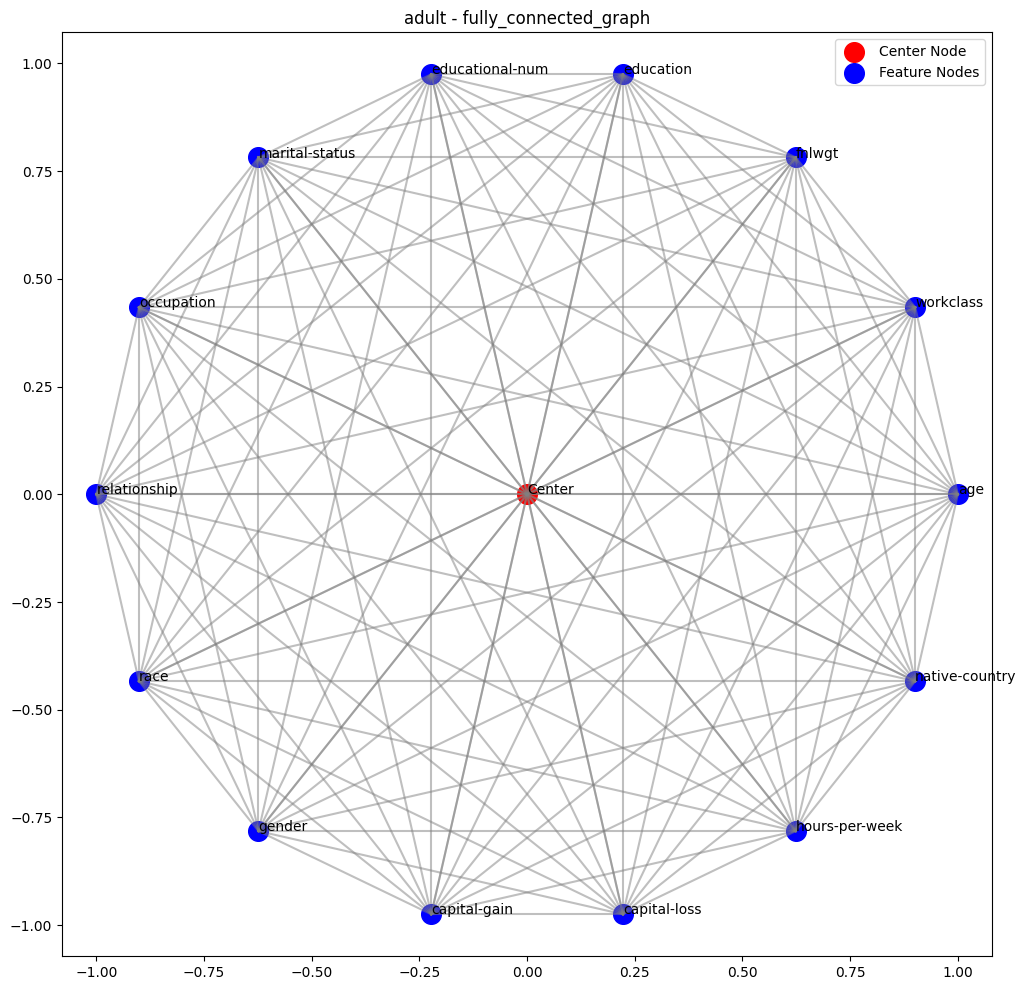


Total samples: 48842
Class distribution:
  Label 0: 37155 samples (76.07%)
  Label 1: 11687 samples (23.93%)
--------------------------------------------------

==================== Analyzing bank dataset ====================

=== bank - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_bank.pkl


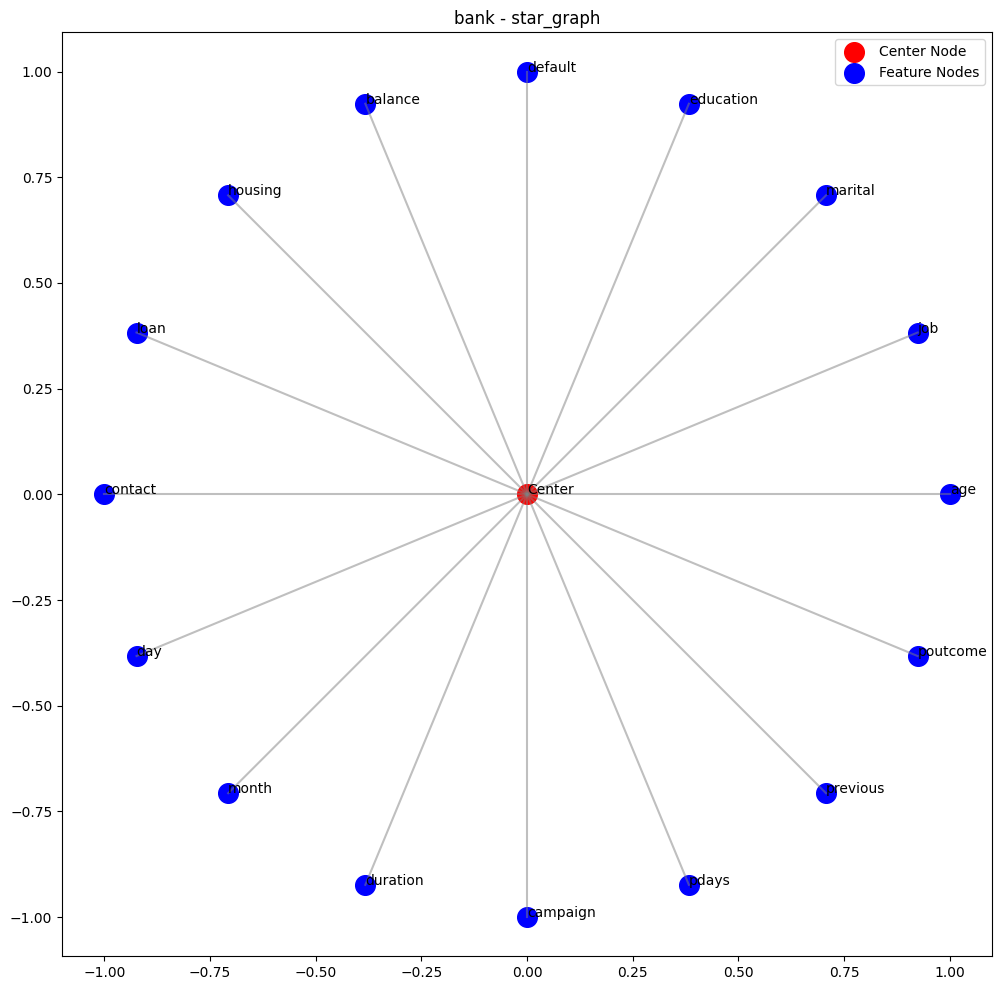


Total samples: 45211
Class distribution:
  Label 0: 39922 samples (88.30%)
  Label 1: 5289 samples (11.70%)
--------------------------------------------------

=== bank - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_bank.pkl


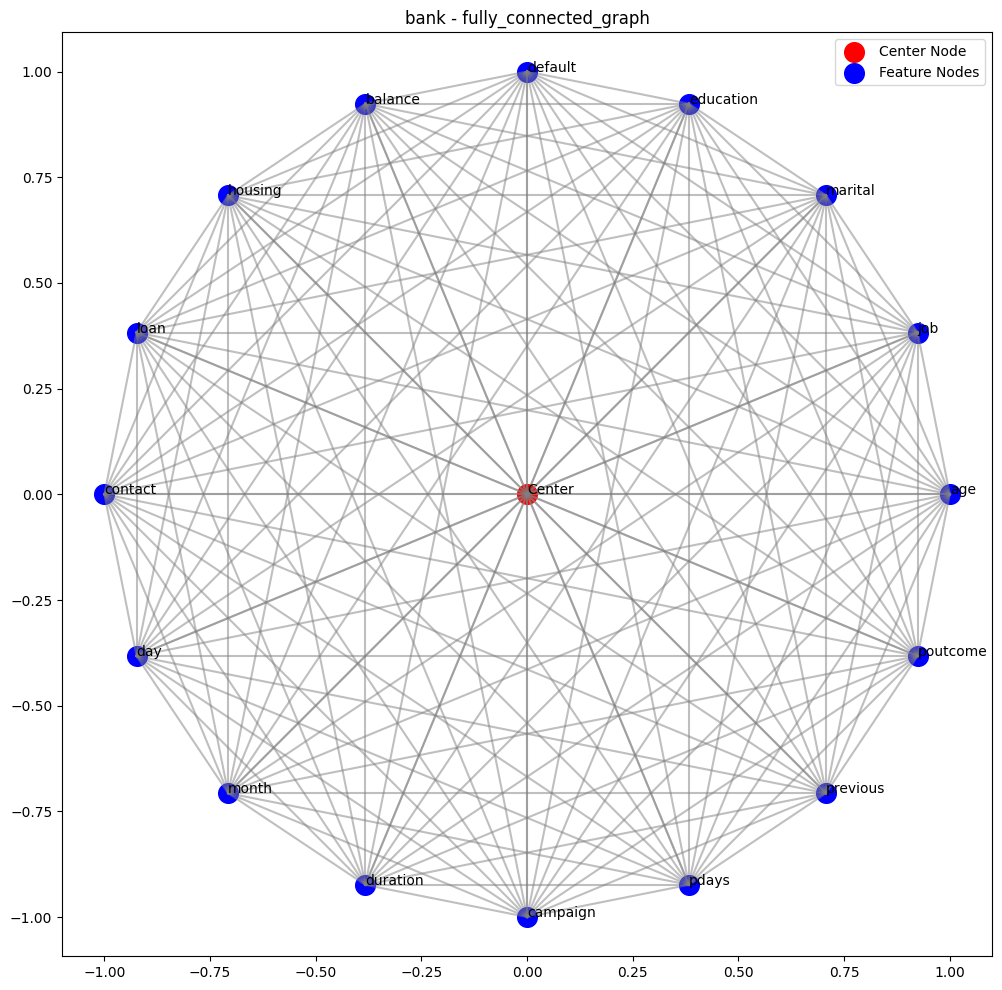


Total samples: 45211
Class distribution:
  Label 0: 39922 samples (88.30%)
  Label 1: 5289 samples (11.70%)
--------------------------------------------------

==================== Analyzing blood dataset ====================

=== blood - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_blood.pkl


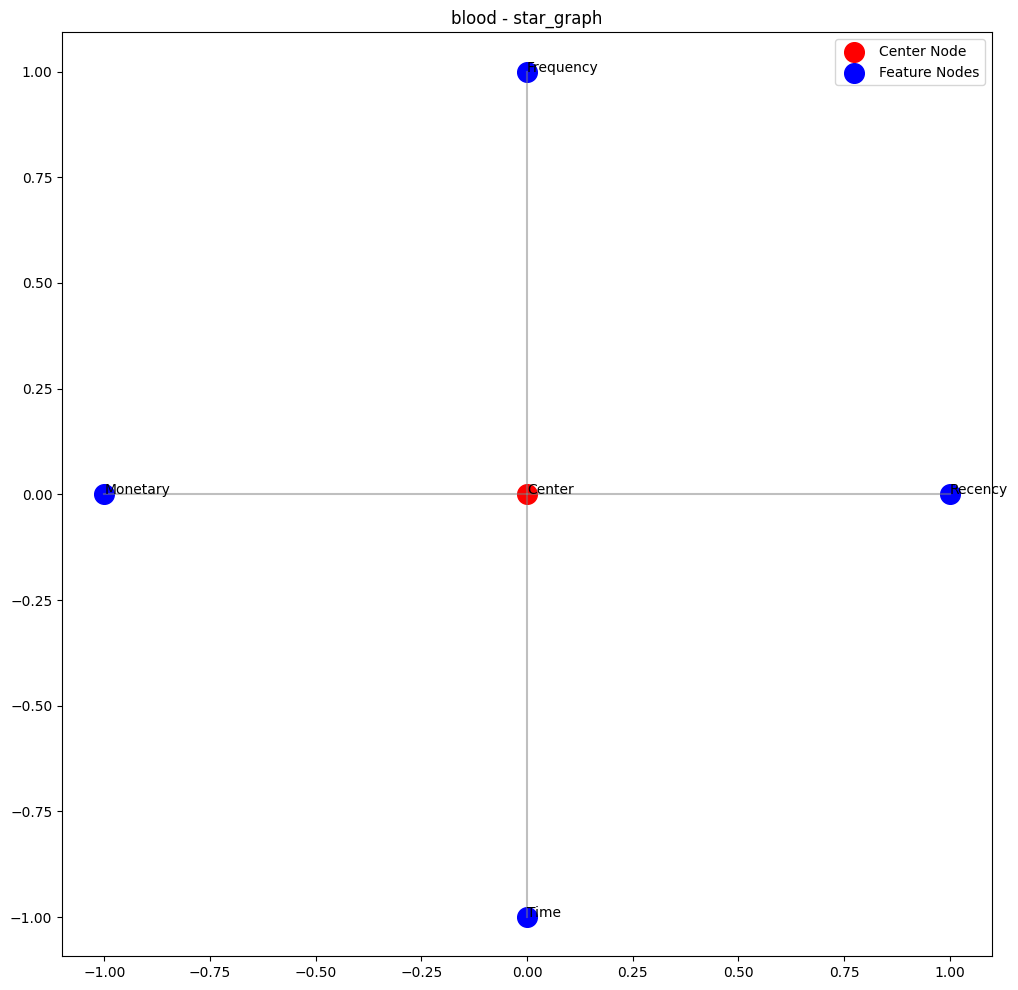


Total samples: 748
Class distribution:
  Label 0: 570 samples (76.20%)
  Label 1: 178 samples (23.80%)
--------------------------------------------------

=== blood - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_blood.pkl


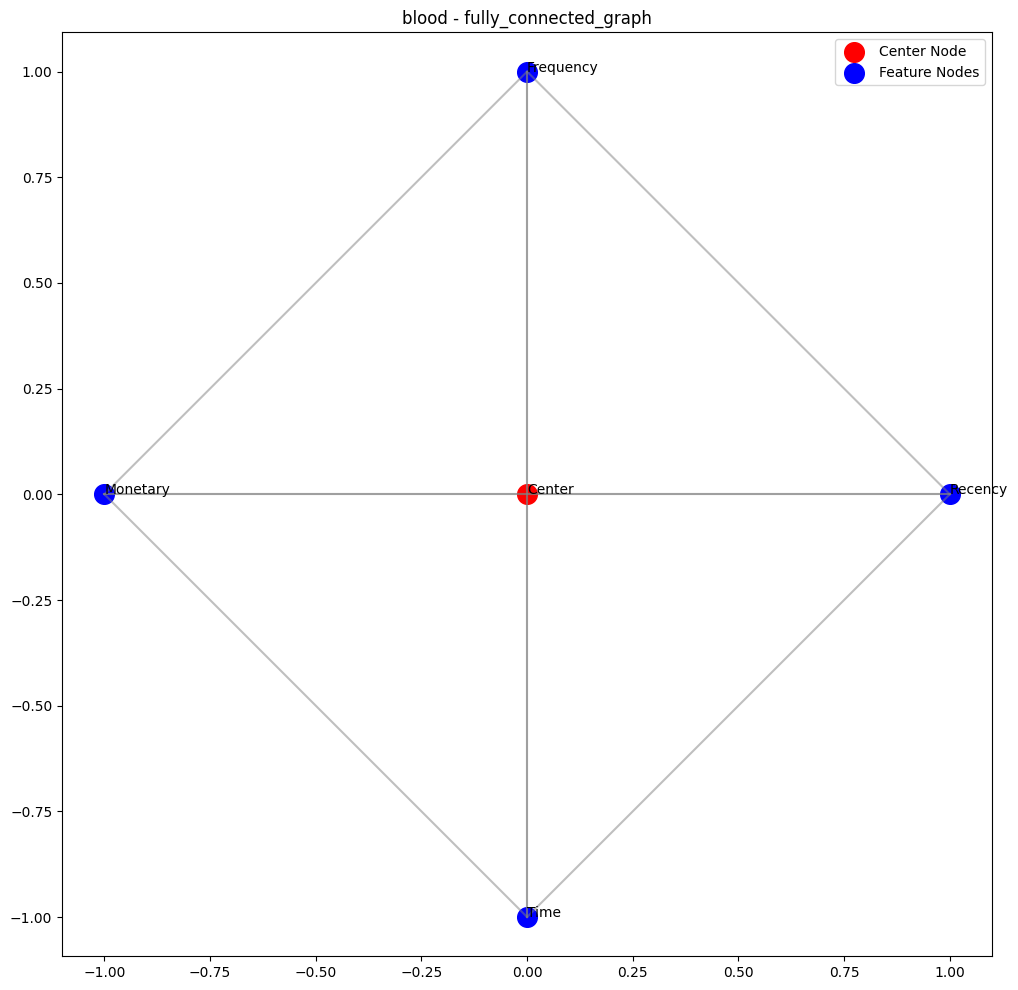


Total samples: 748
Class distribution:
  Label 0: 570 samples (76.20%)
  Label 1: 178 samples (23.80%)
--------------------------------------------------

==================== Analyzing car dataset ====================

=== car - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_car.pkl


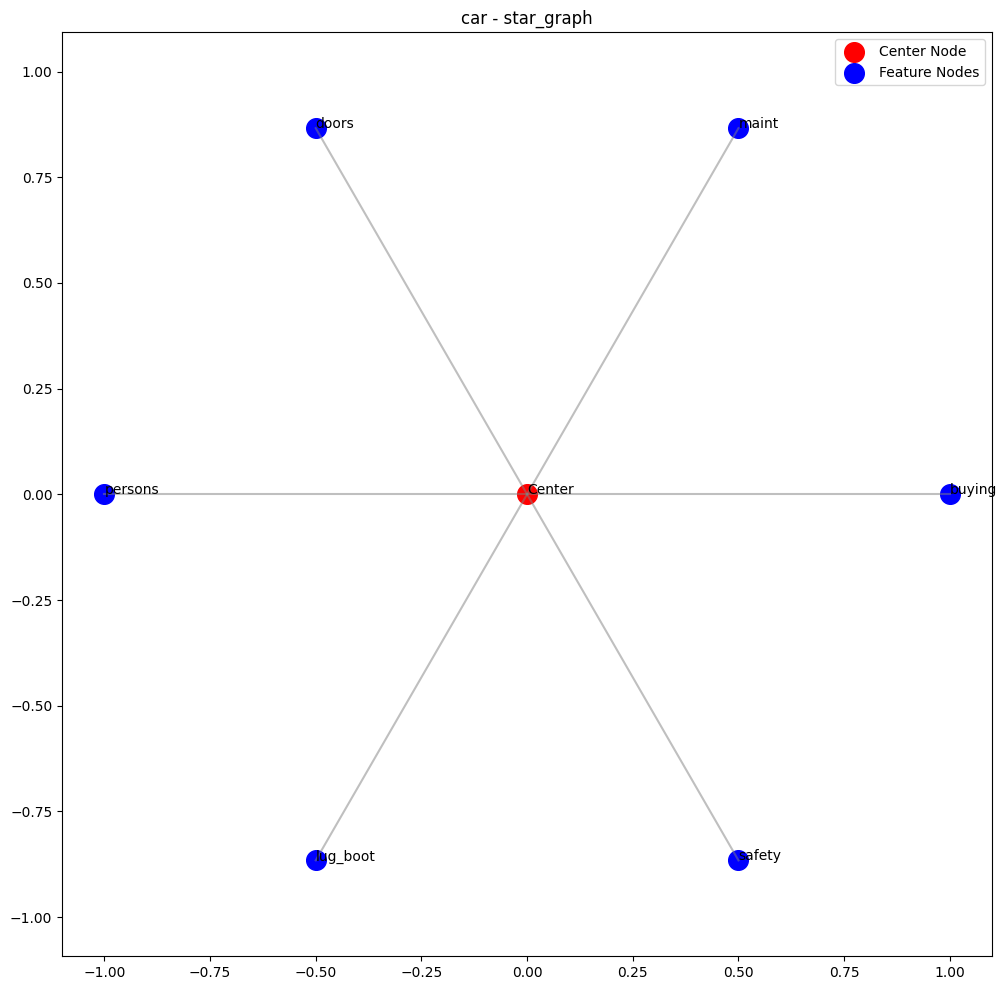


Total samples: 1728
Class distribution:
  Label 0: 1210 samples (70.02%)
  Label 1: 384 samples (22.22%)
  Label 2: 69 samples (3.99%)
  Label 3: 65 samples (3.76%)
--------------------------------------------------

=== car - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_car.pkl


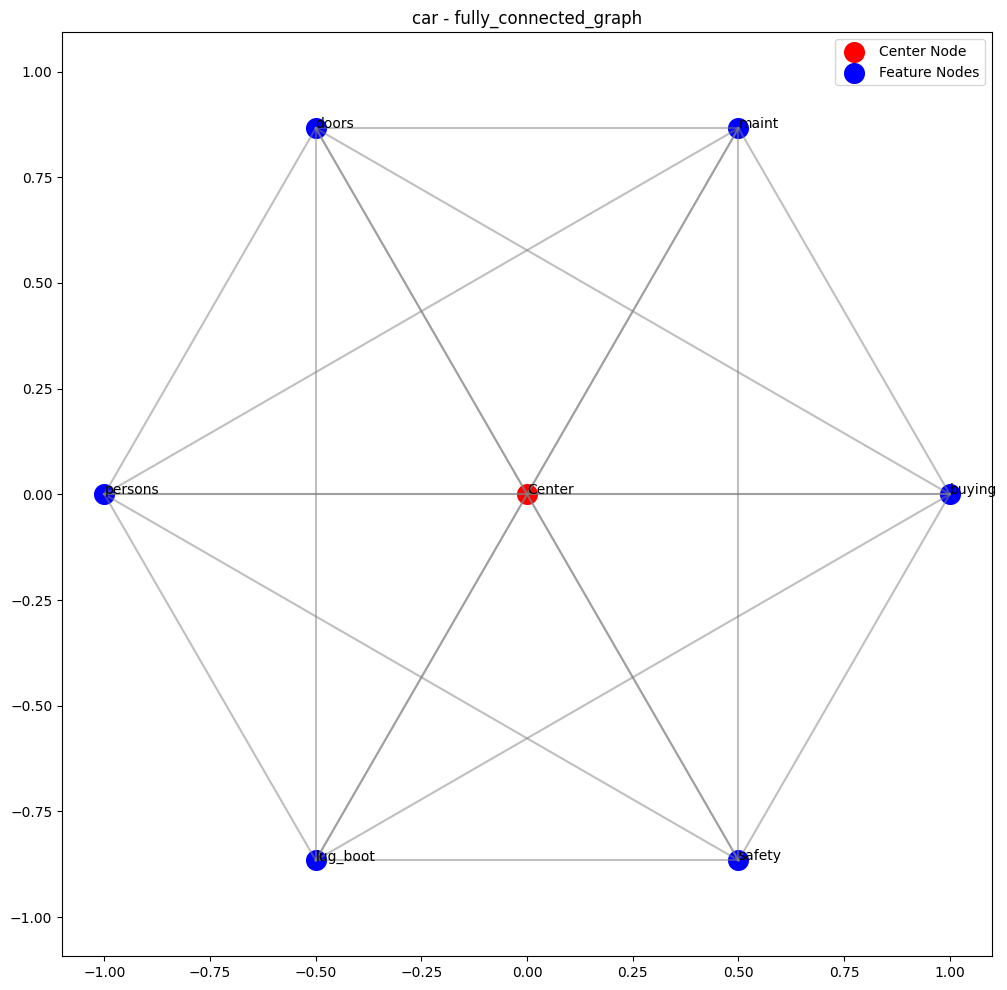


Total samples: 1728
Class distribution:
  Label 0: 1210 samples (70.02%)
  Label 1: 384 samples (22.22%)
  Label 2: 69 samples (3.99%)
  Label 3: 65 samples (3.76%)
--------------------------------------------------

==================== Analyzing communities dataset ====================

=== communities - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_communities.pkl


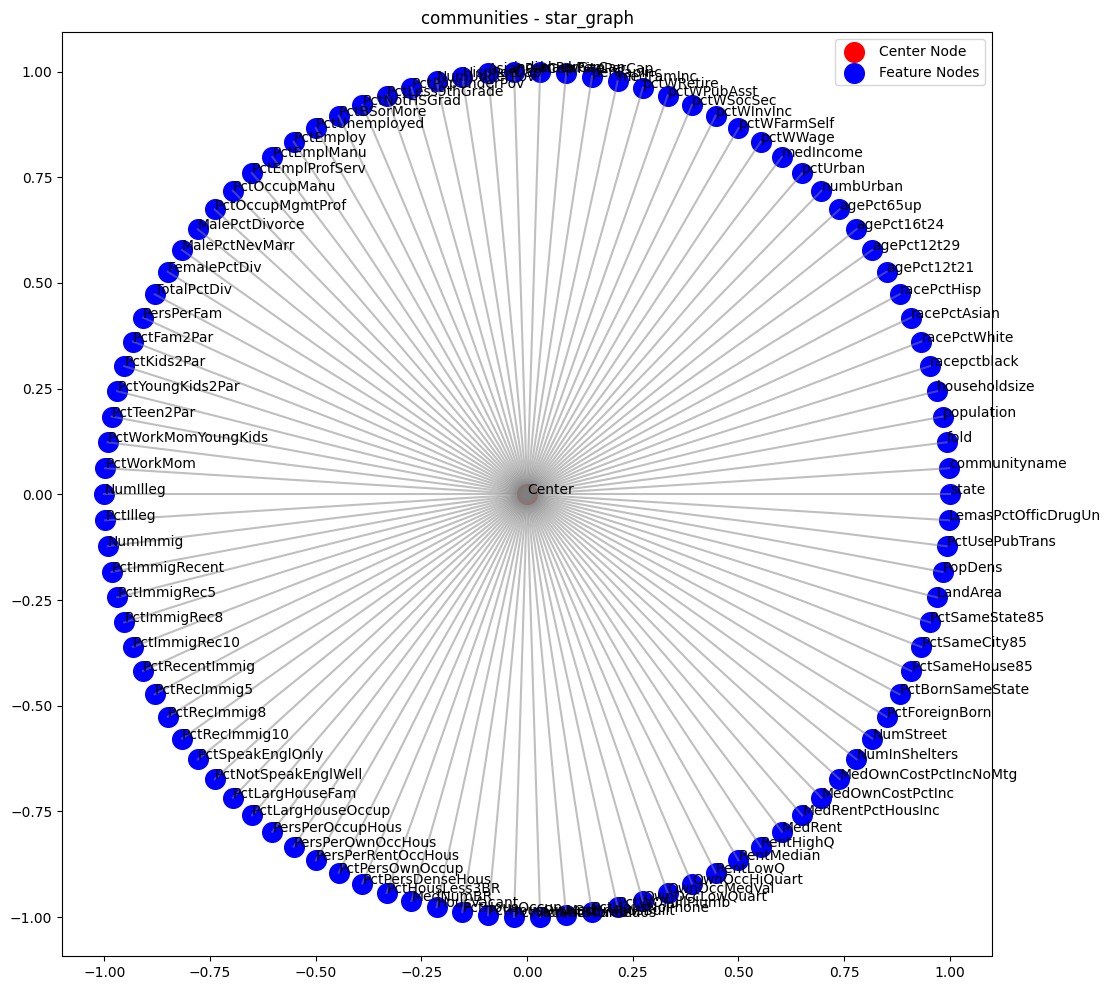


Total samples: 1994
Class distribution:
  Label 0: 653 samples (32.75%)
  Label 1: 662 samples (33.20%)
  Label 2: 679 samples (34.05%)
--------------------------------------------------

=== communities - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_communities.pkl


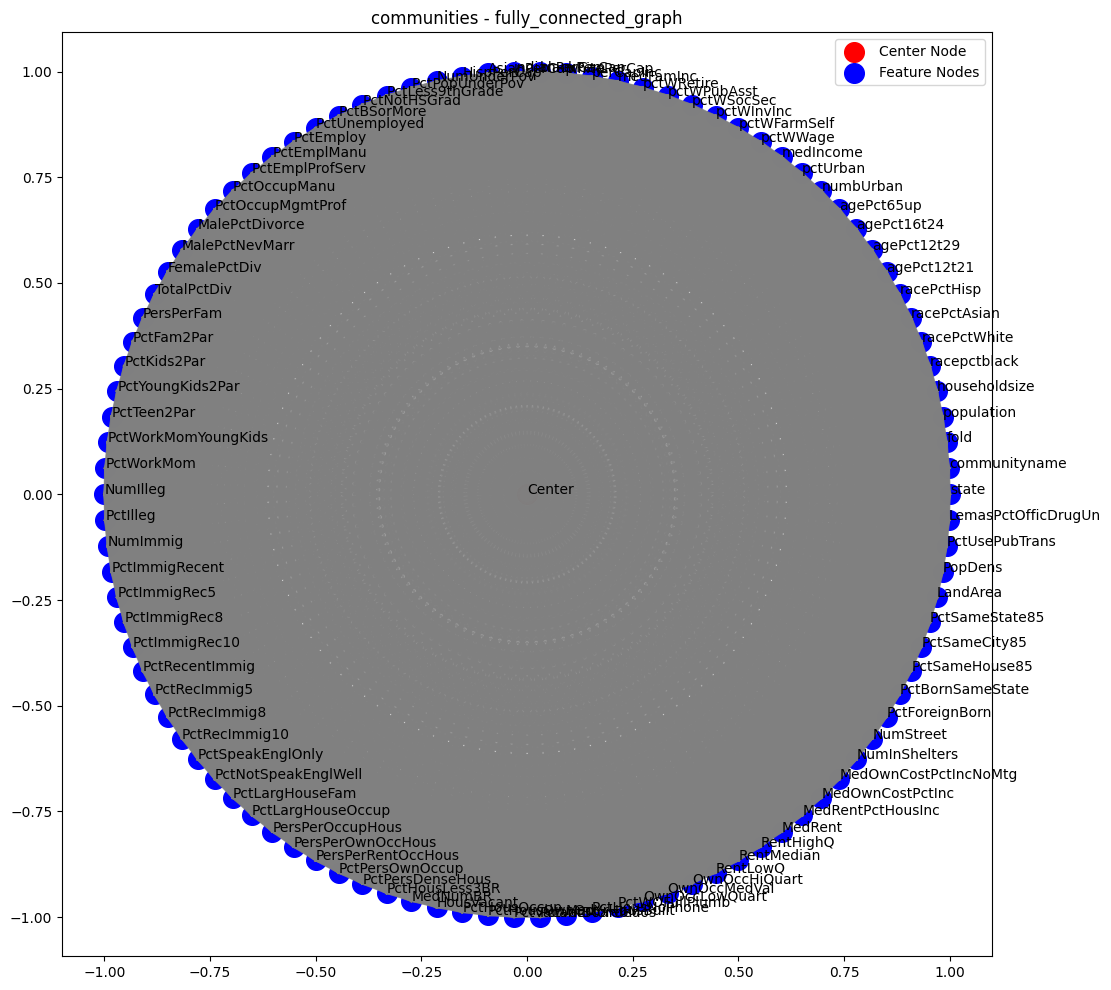


Total samples: 1994
Class distribution:
  Label 0: 653 samples (32.75%)
  Label 1: 662 samples (33.20%)
  Label 2: 679 samples (34.05%)
--------------------------------------------------

==================== Analyzing credit-g dataset ====================

=== credit-g - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_credit-g.pkl


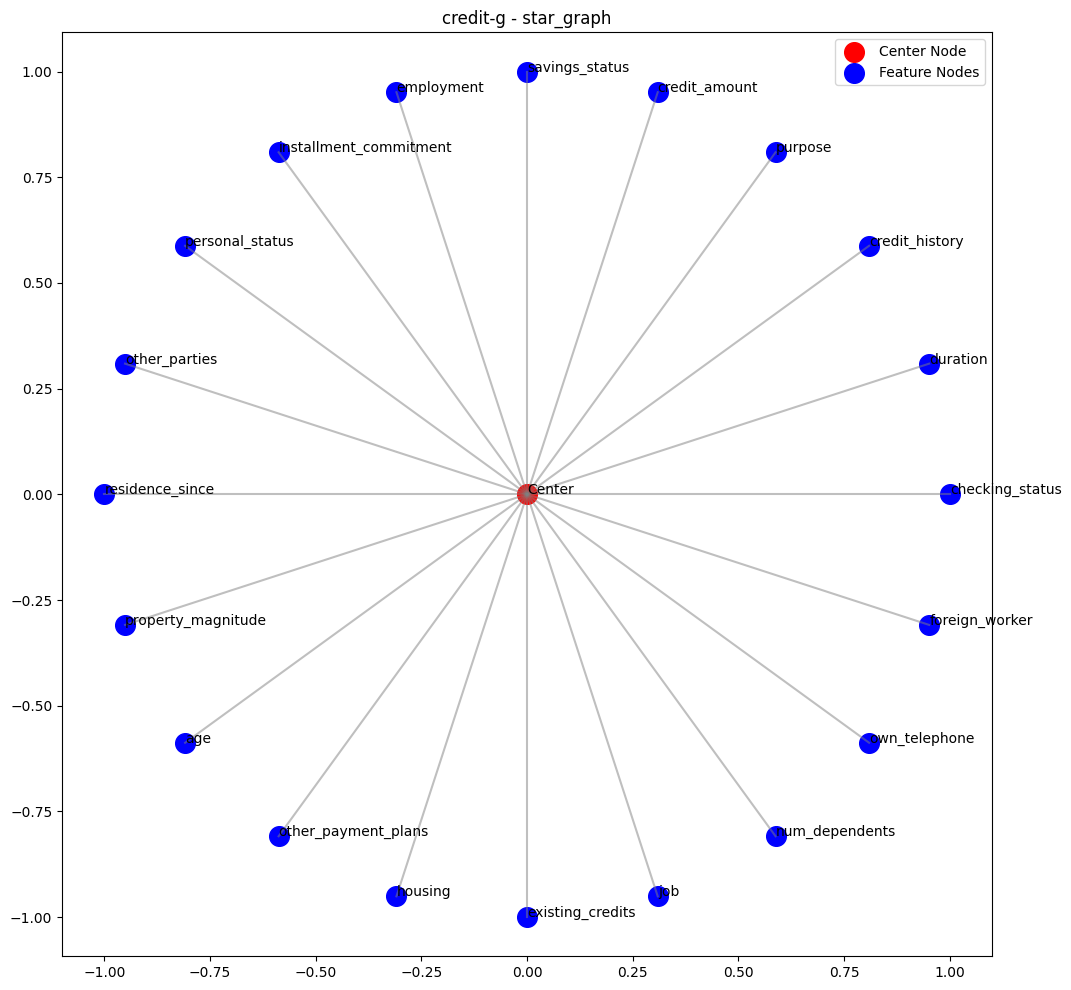


Total samples: 1000
Class distribution:
  Label 0: 300 samples (30.00%)
  Label 1: 700 samples (70.00%)
--------------------------------------------------

=== credit-g - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_credit-g.pkl


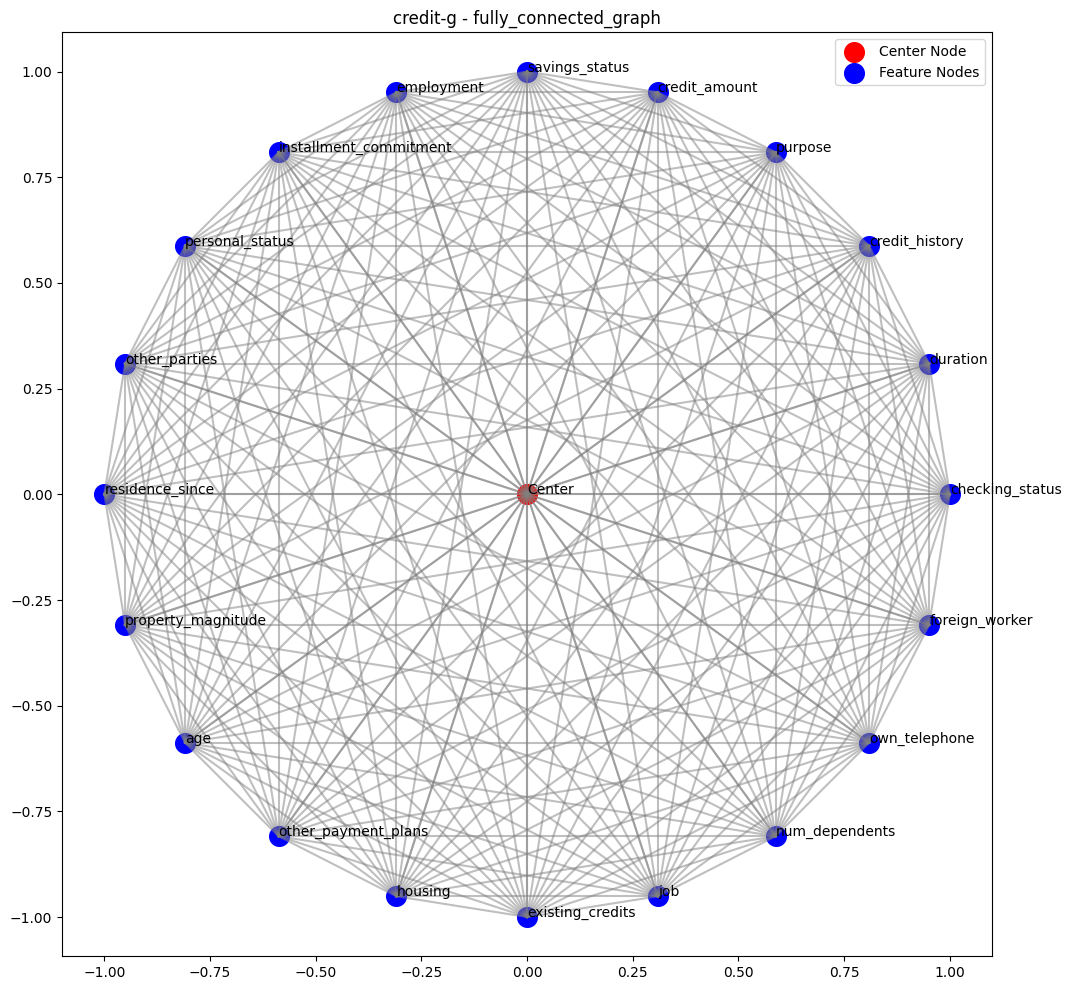


Total samples: 1000
Class distribution:
  Label 0: 300 samples (30.00%)
  Label 1: 700 samples (70.00%)
--------------------------------------------------

==================== Analyzing diabetes dataset ====================

=== diabetes - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_diabetes.pkl


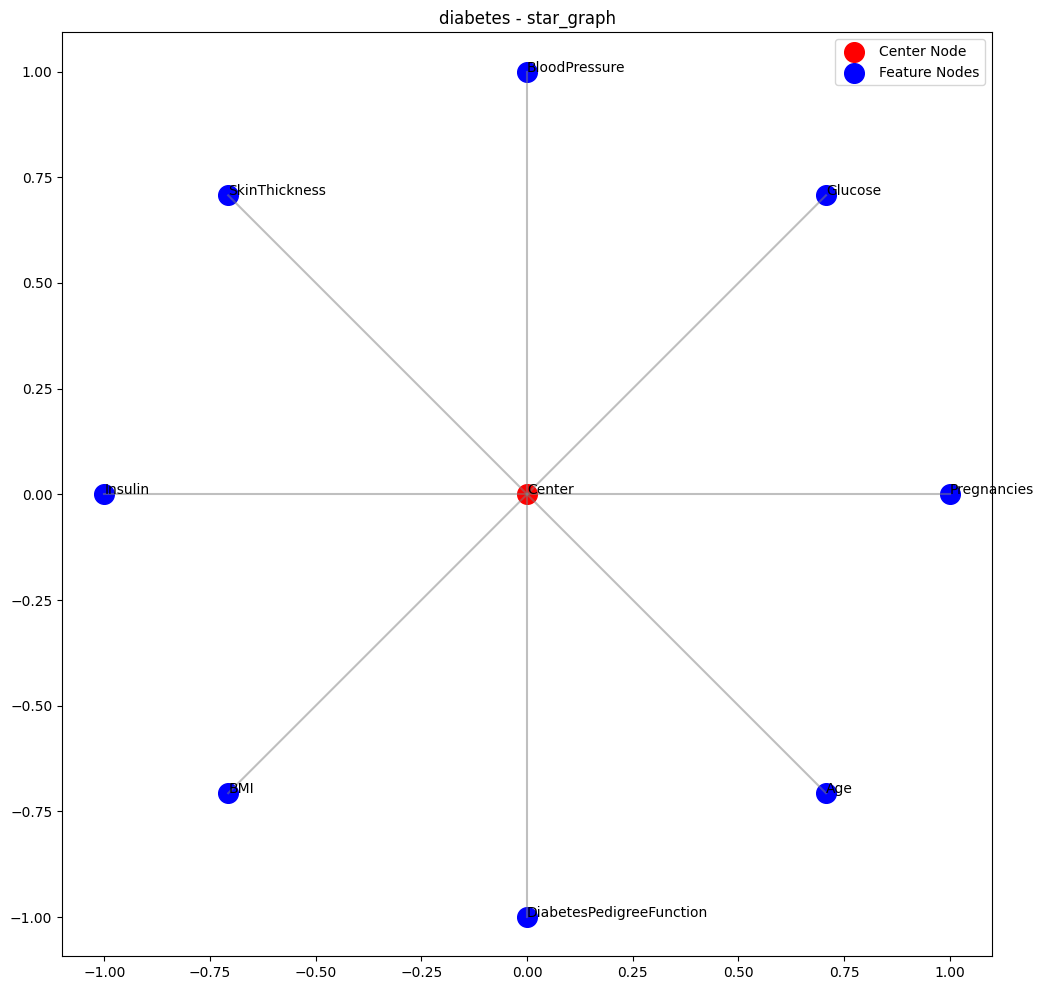


Total samples: 768
Class distribution:
  Label 0: 500 samples (65.10%)
  Label 1: 268 samples (34.90%)
--------------------------------------------------

=== diabetes - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_diabetes.pkl


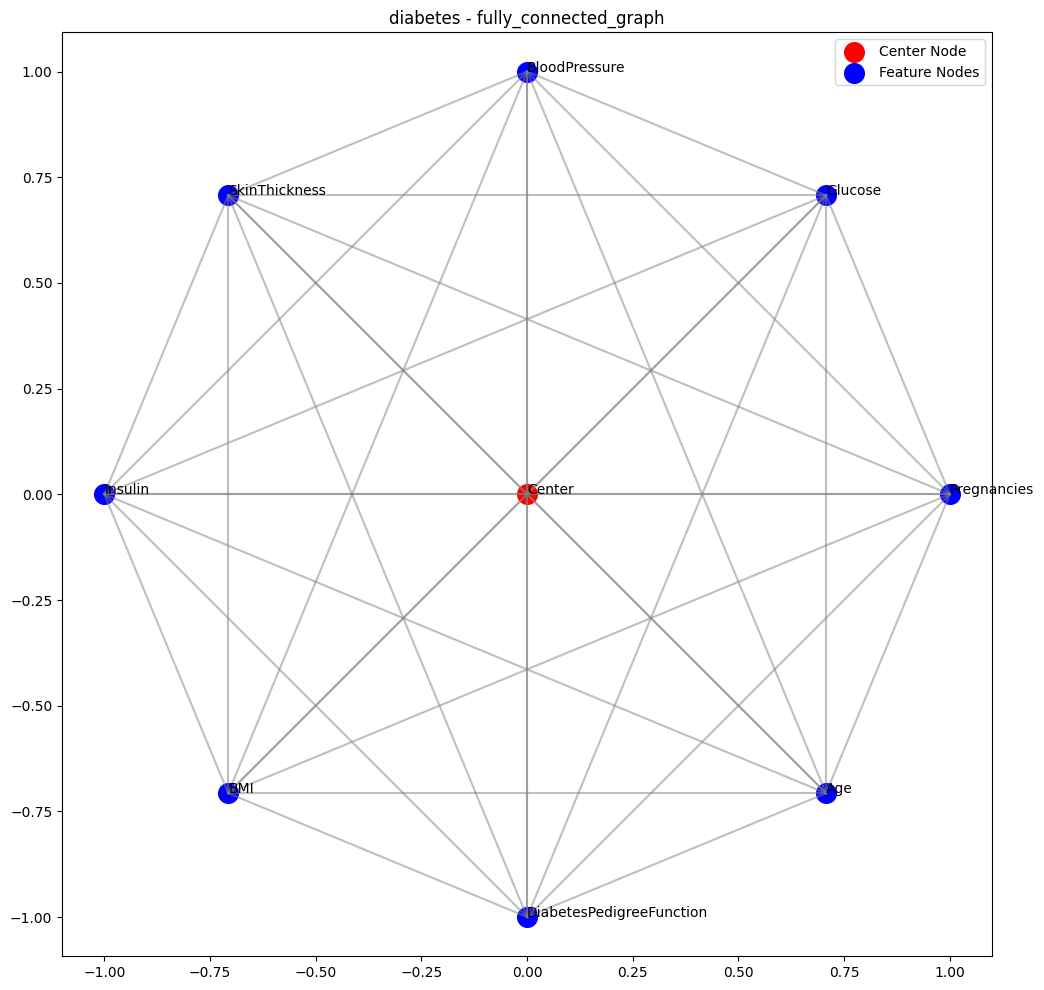


Total samples: 768
Class distribution:
  Label 0: 500 samples (65.10%)
  Label 1: 268 samples (34.90%)
--------------------------------------------------

==================== Analyzing myocardial dataset ====================

=== myocardial - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_myocardial.pkl


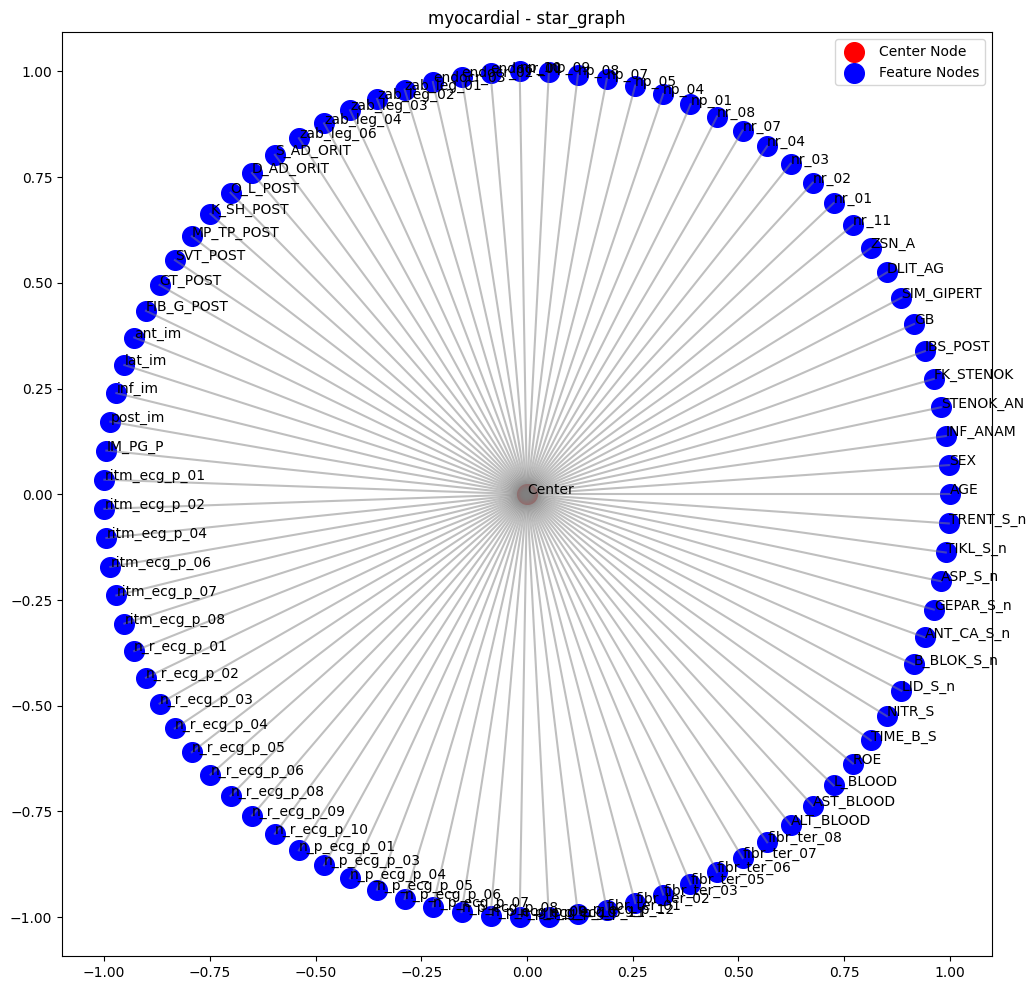


Total samples: 686
Class distribution:
  Label 0: 534 samples (77.84%)
  Label 1: 152 samples (22.16%)
--------------------------------------------------

=== myocardial - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_myocardial.pkl


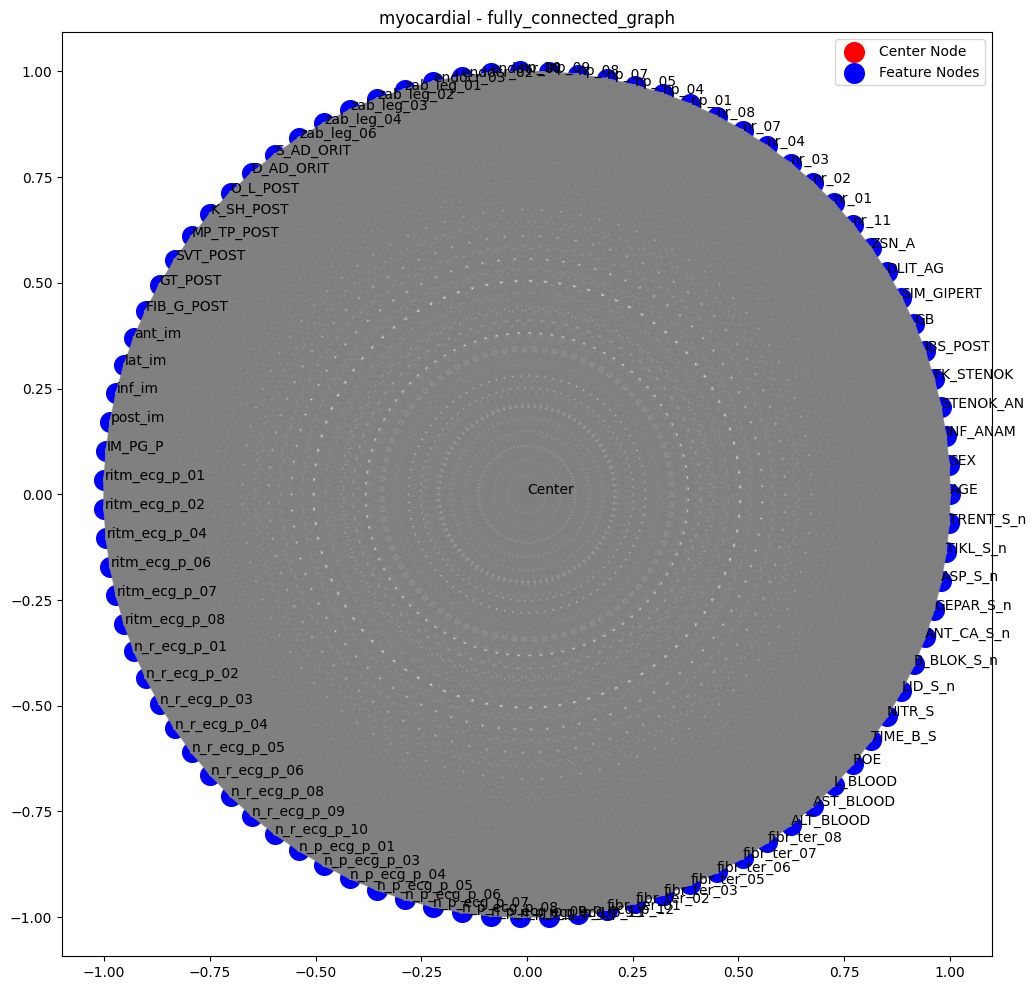


Total samples: 686
Class distribution:
  Label 0: 534 samples (77.84%)
  Label 1: 152 samples (22.16%)
--------------------------------------------------

==================== Analyzing cleveland dataset ====================

=== cleveland - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_cleveland.pkl


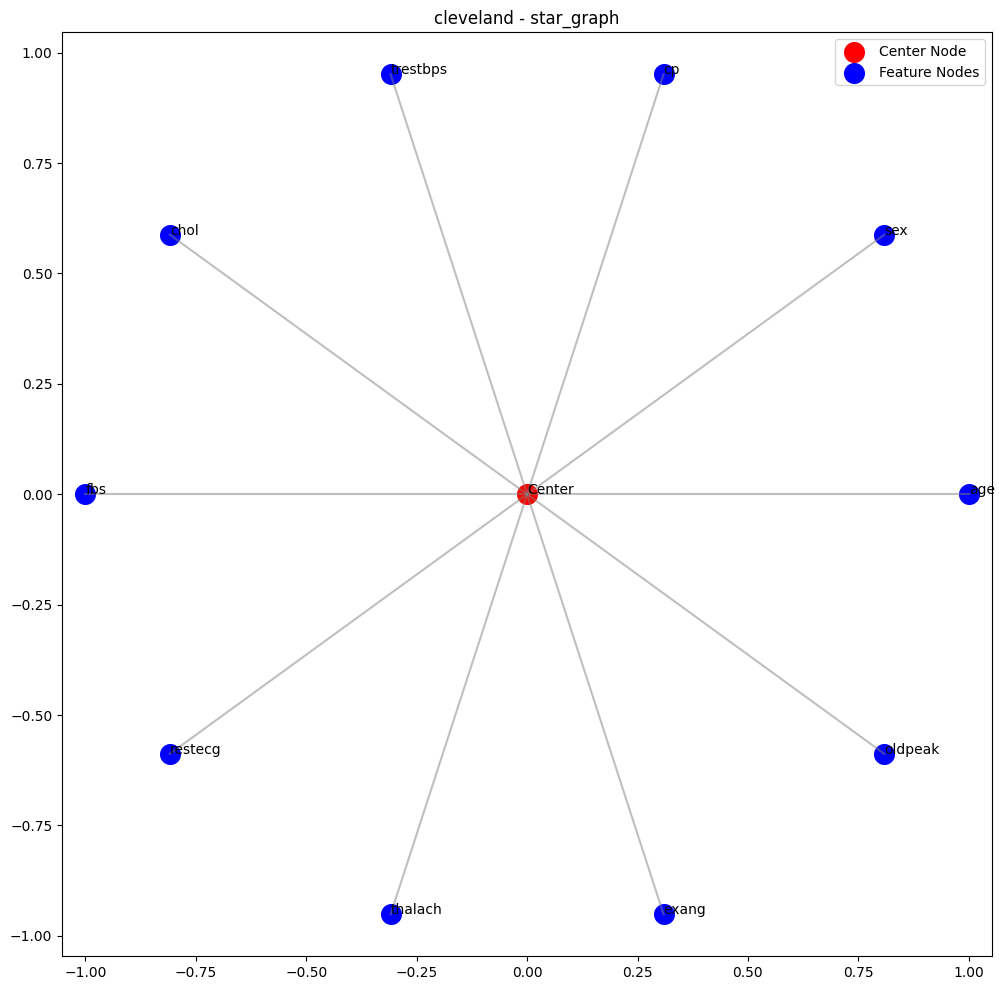


Total samples: 303
Class distribution:
  Label 0: 164 samples (54.13%)
  Label 1: 139 samples (45.87%)
--------------------------------------------------

=== cleveland - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_cleveland.pkl


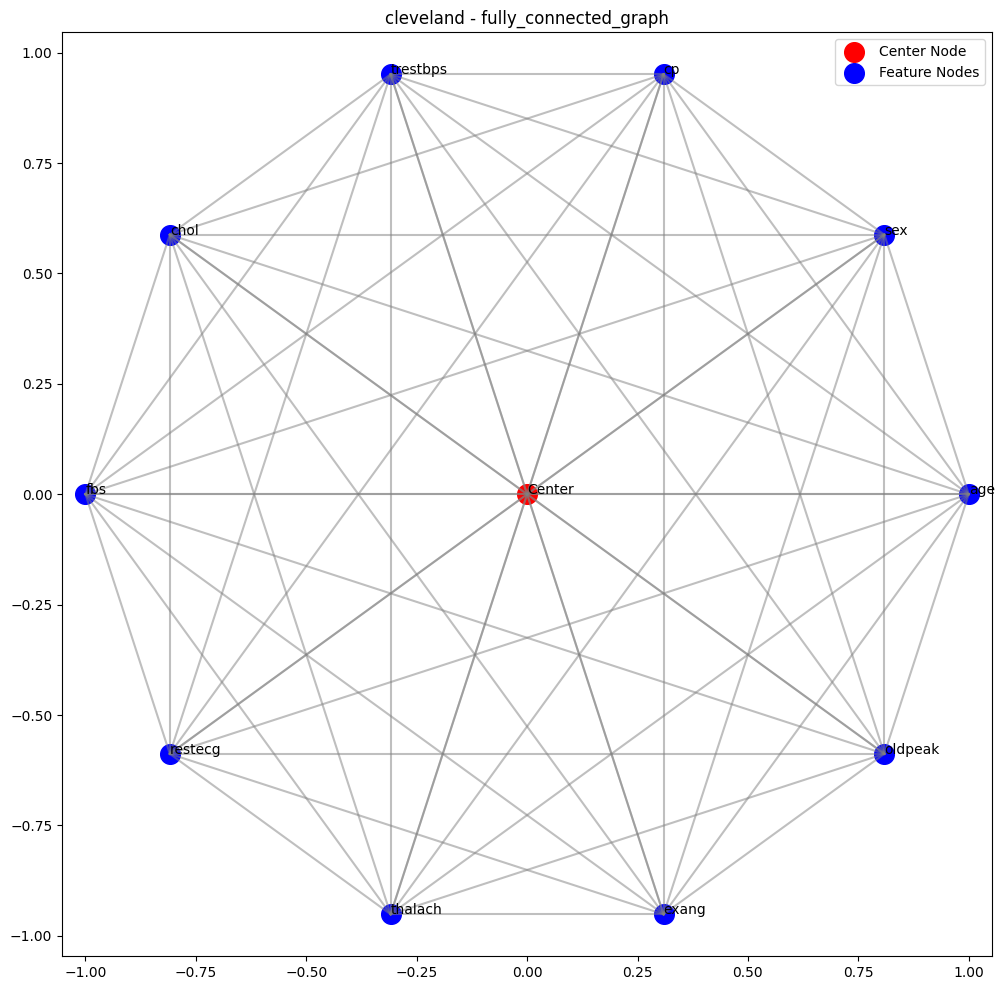


Total samples: 303
Class distribution:
  Label 0: 164 samples (54.13%)
  Label 1: 139 samples (45.87%)
--------------------------------------------------

==================== Analyzing hungarian dataset ====================

=== hungarian - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_hungarian.pkl


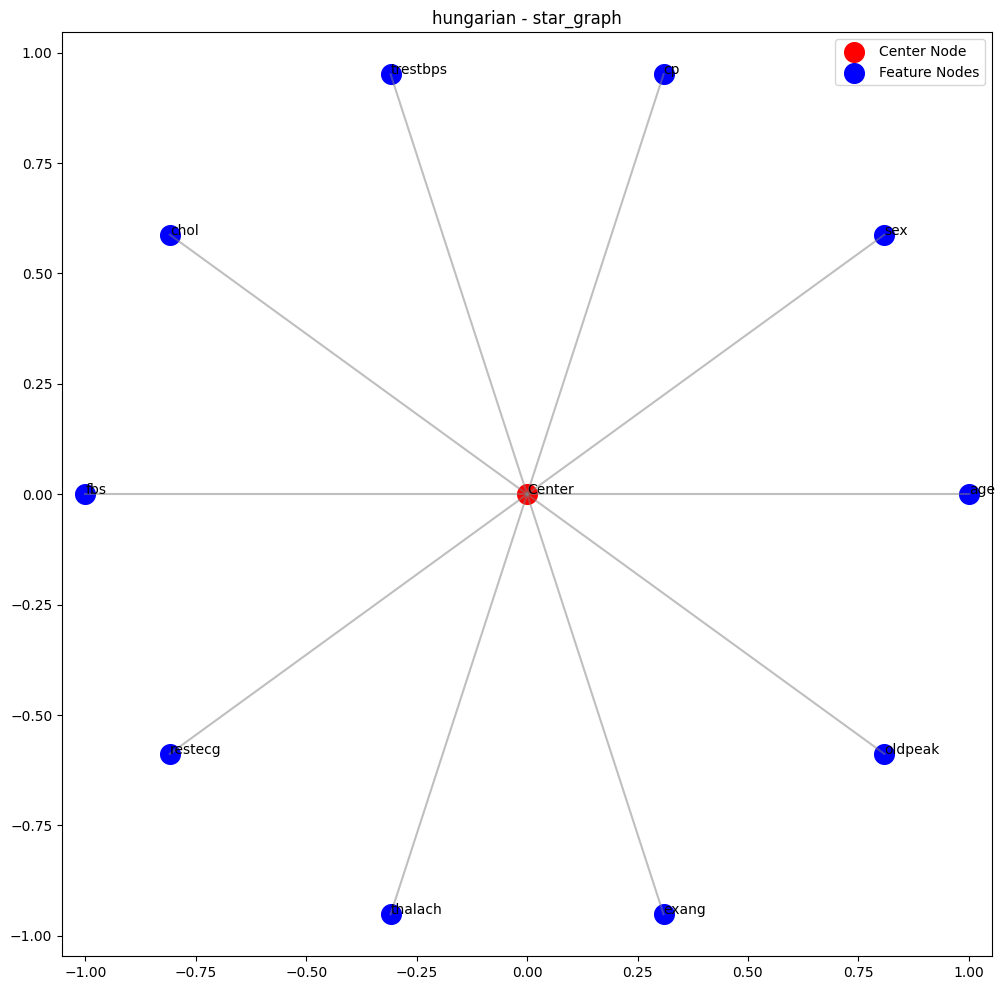


Total samples: 294
Class distribution:
  Label 0: 188 samples (63.95%)
  Label 1: 106 samples (36.05%)
--------------------------------------------------

=== hungarian - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_hungarian.pkl


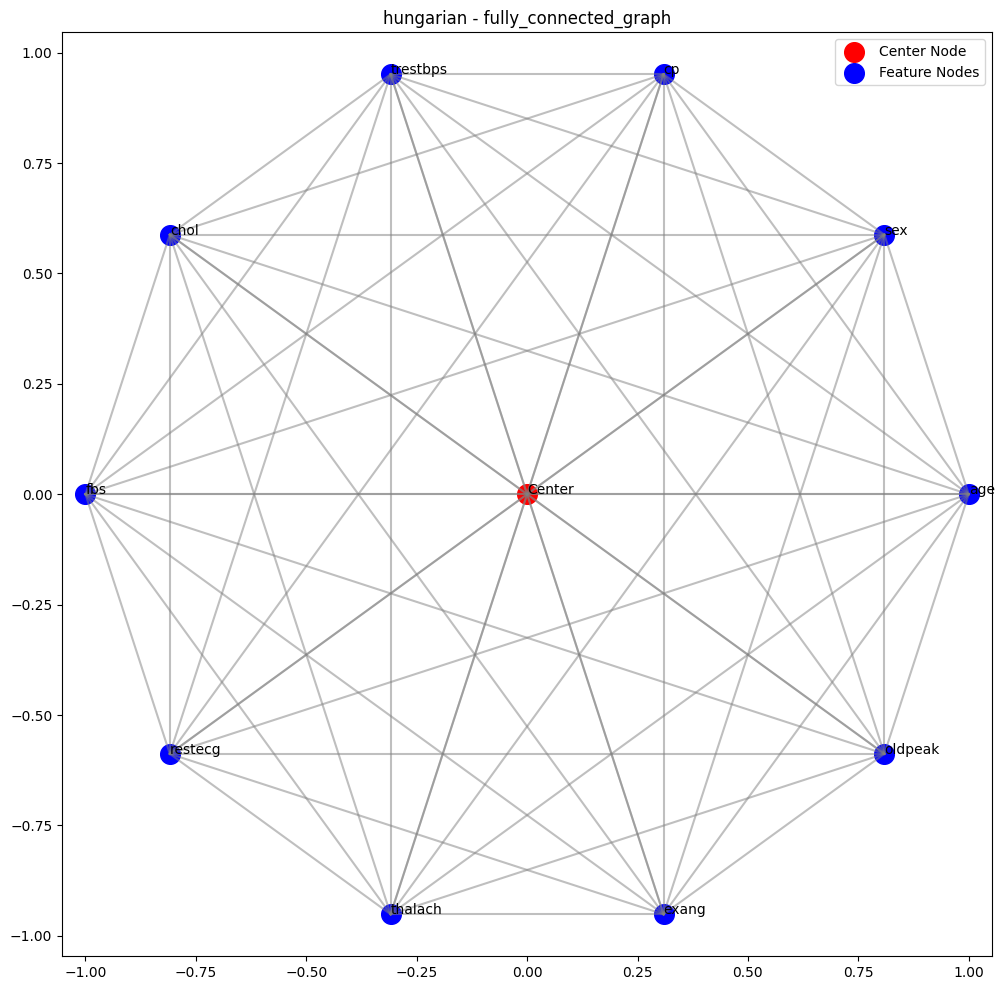


Total samples: 294
Class distribution:
  Label 0: 188 samples (63.95%)
  Label 1: 106 samples (36.05%)
--------------------------------------------------

==================== Analyzing switzerland dataset ====================

=== switzerland - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_switzerland.pkl


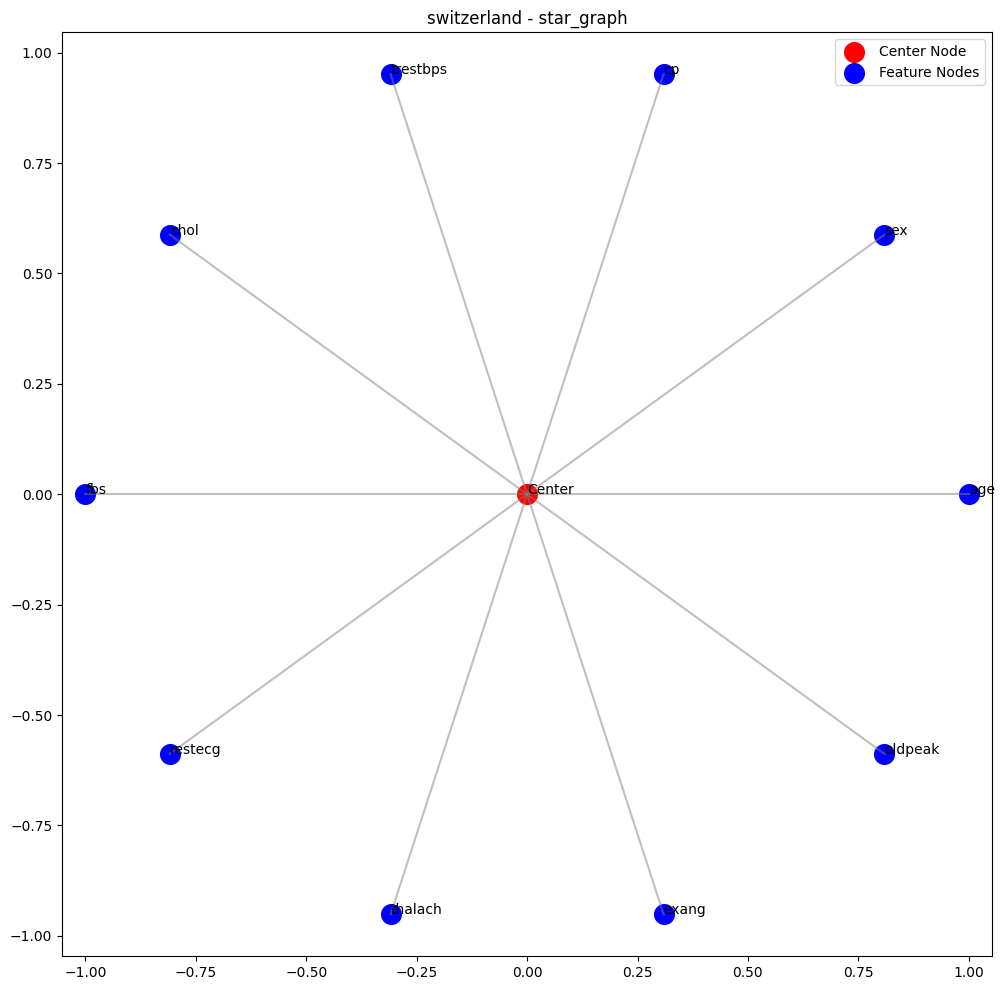


Total samples: 123
Class distribution:
  Label 0: 8 samples (6.50%)
  Label 1: 115 samples (93.50%)
--------------------------------------------------

=== switzerland - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_switzerland.pkl


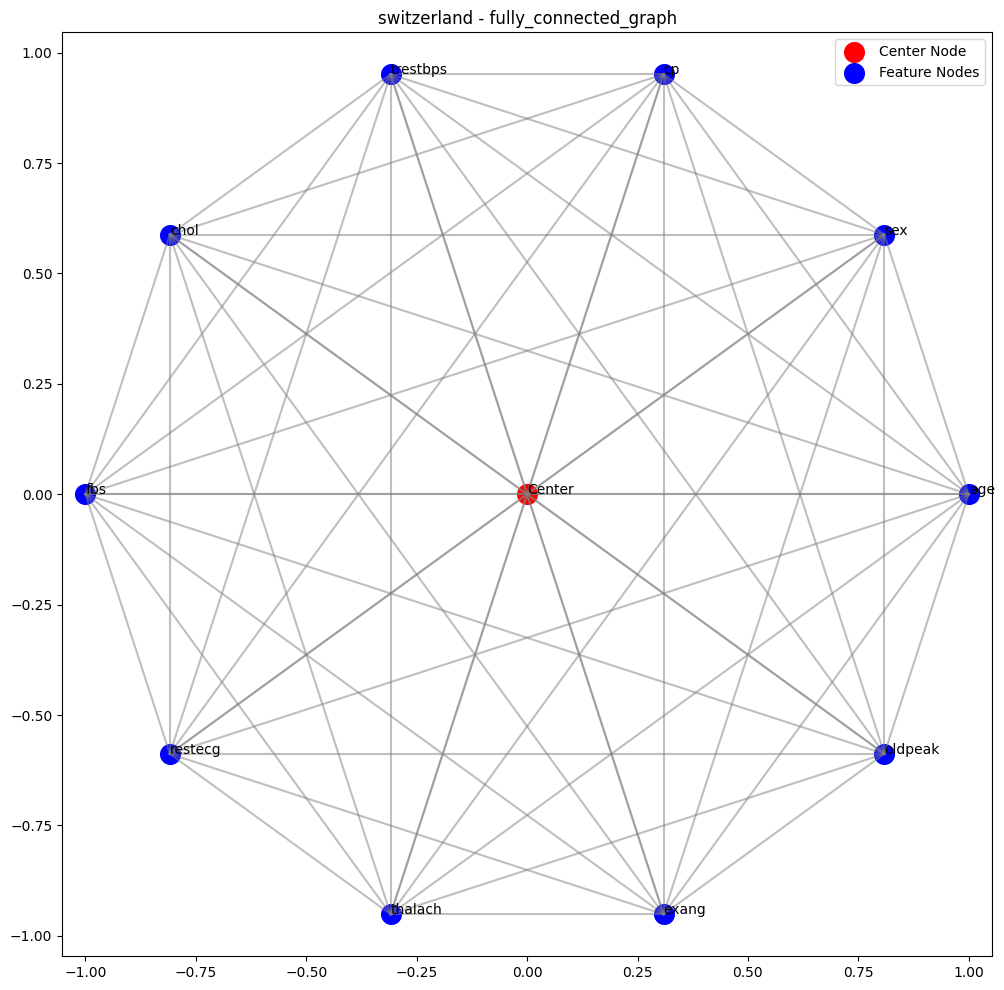


Total samples: 123
Class distribution:
  Label 0: 8 samples (6.50%)
  Label 1: 115 samples (93.50%)
--------------------------------------------------

==================== Analyzing heart_statlog dataset ====================

=== heart_statlog - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_heart_statlog.pkl


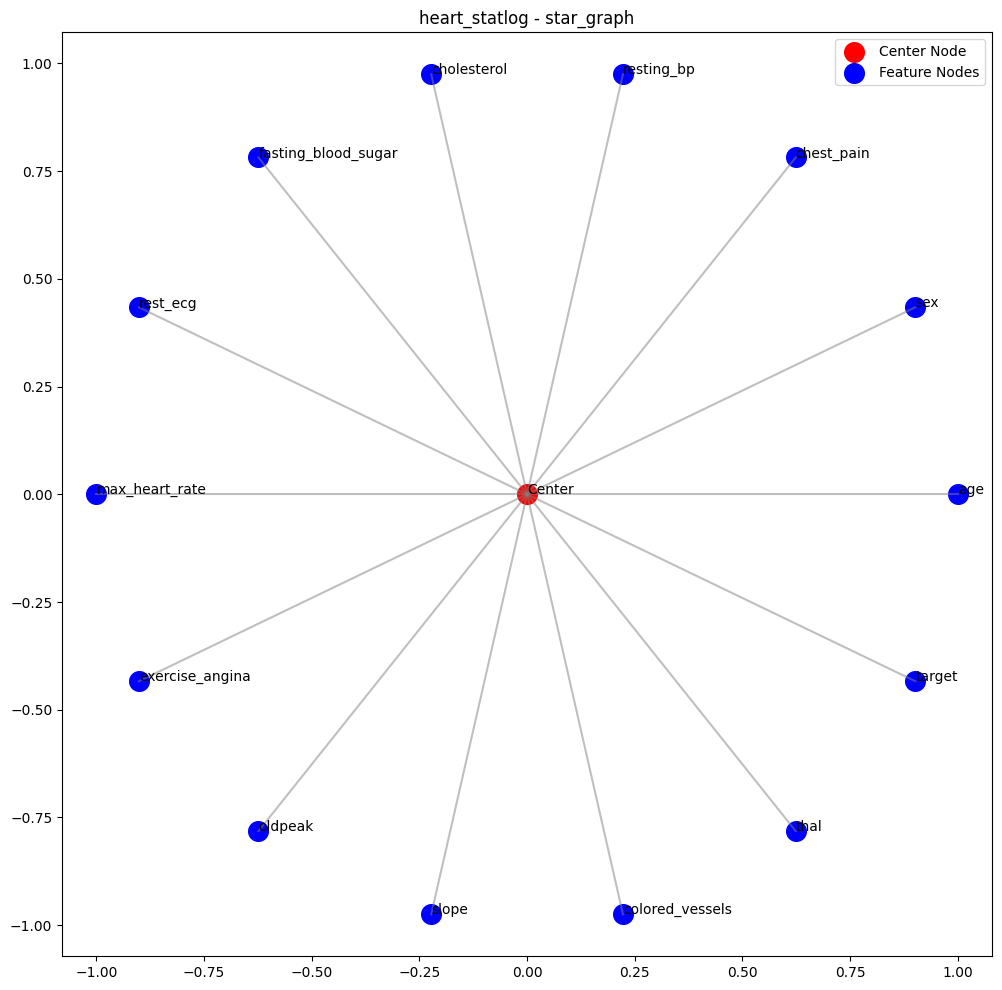


Total samples: 270
Class distribution:
  Label 0: 150 samples (55.56%)
  Label 1: 120 samples (44.44%)
--------------------------------------------------

=== heart_statlog - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_heart_statlog.pkl


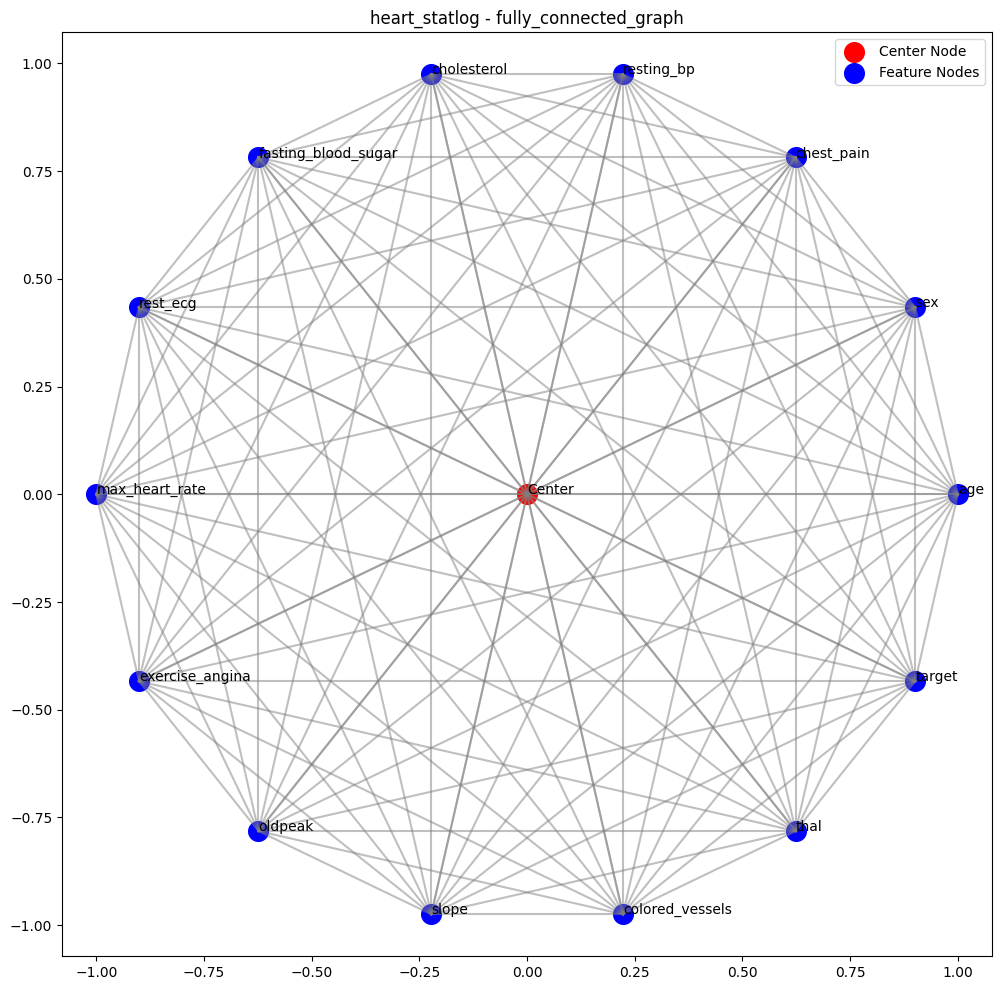


Total samples: 270
Class distribution:
  Label 0: 150 samples (55.56%)
  Label 1: 120 samples (44.44%)
--------------------------------------------------

==================== Analyzing heart dataset ====================

=== heart - star_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/star_graph/star_graph_heart.pkl


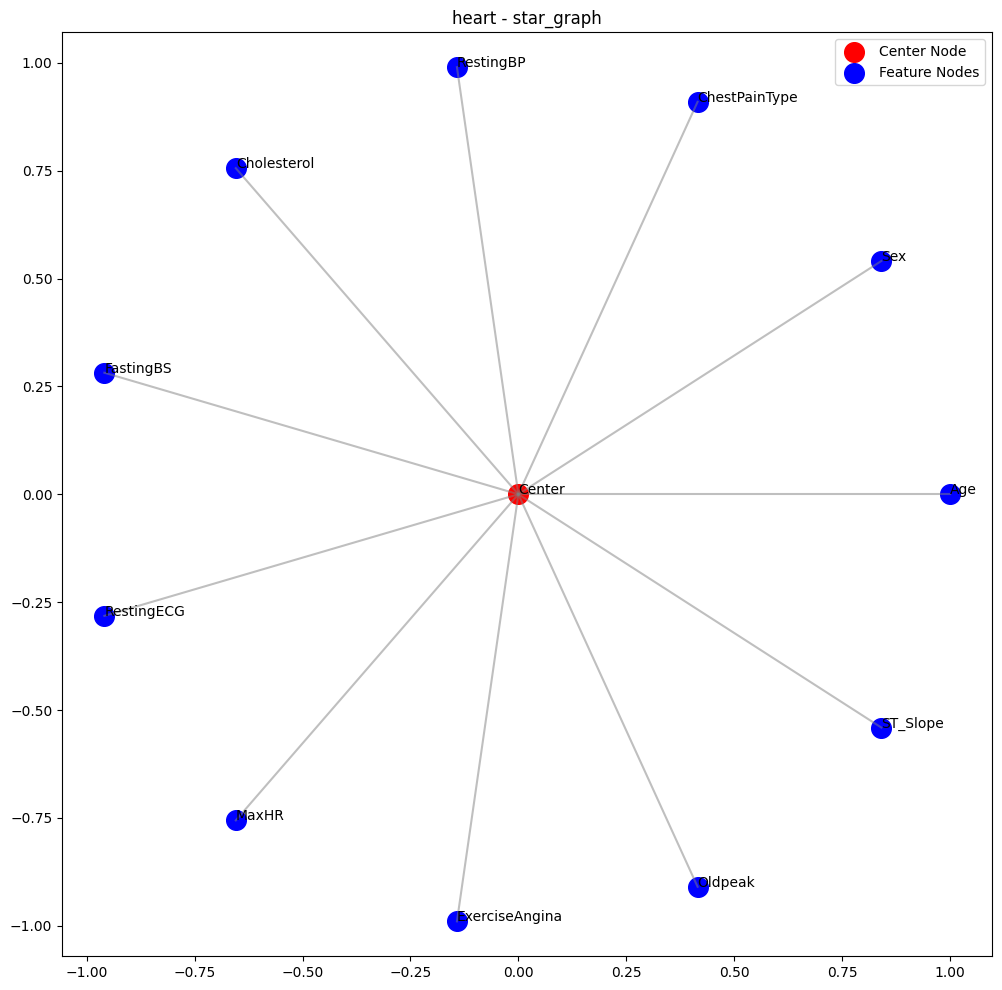


Total samples: 918
Class distribution:
  Label 0: 410 samples (44.66%)
  Label 1: 508 samples (55.34%)
--------------------------------------------------

=== heart - fully_connected_graph ===
Loading from: /mnt/storage/personal/eungyeop/dataset/graph/fully_connected_graph/fully_connected_graph_heart.pkl


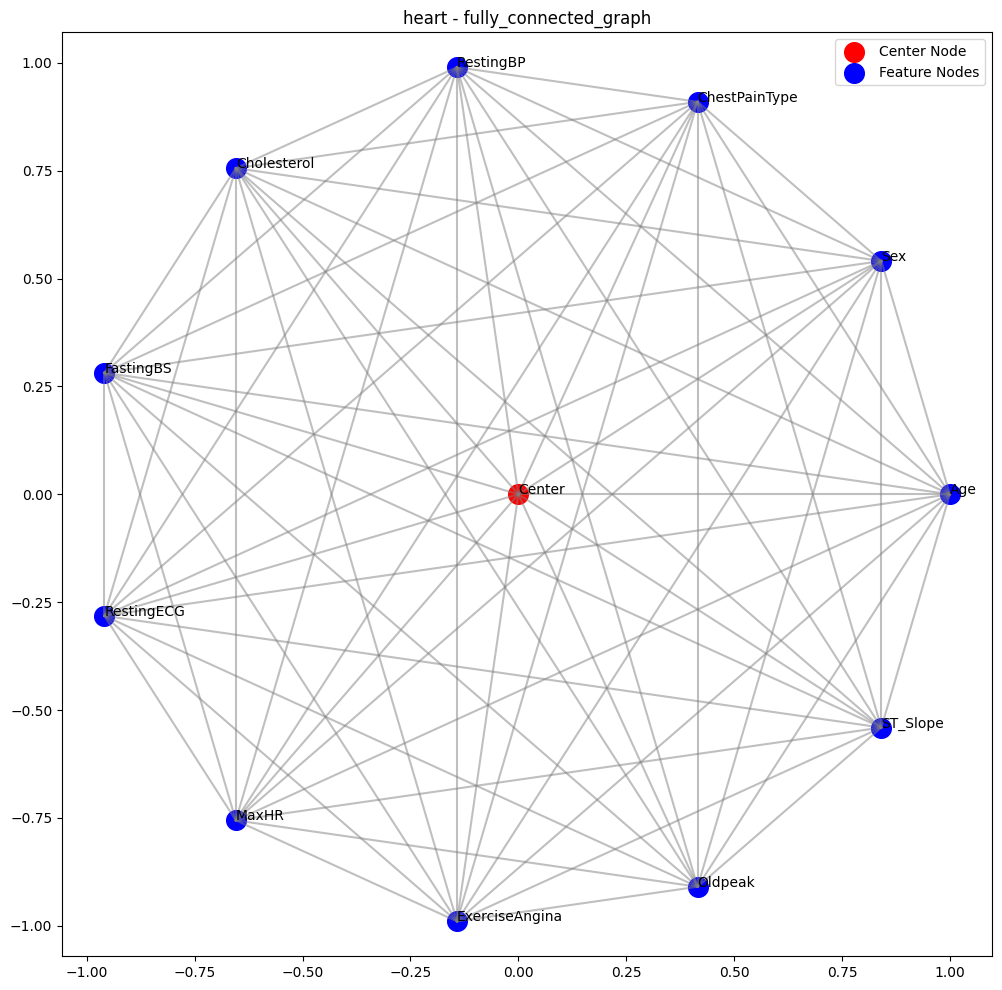


Total samples: 918
Class distribution:
  Label 0: 410 samples (44.66%)
  Label 1: 508 samples (55.34%)
--------------------------------------------------


In [6]:
def analyze_dataset_samples(dataset_name):
    """데이터셋 분석"""
    graph_types = ["star_graph", "fully_connected_graph"]
    
    for graph_type in graph_types:
        print(f"\n=== {dataset_name} - {graph_type} ===")
        
        try:
            data = load_graph_data(dataset_name, graph_type)
            visualize_graph_structure(data[0], dataset_name, graph_type)
            
            # 클래스 분포 분석
            labels = [d.y.item() for d in data]
            label_freq = Counter(labels)
            
            print(f"\nTotal samples: {len(data)}")
            print("Class distribution:")
            for label, count in sorted(label_freq.items()):
                print(f"  Label {label}: {count} samples ({count/len(data)*100:.2f}%)")
                
        except Exception as e:
            print(f"Error processing dataset: {str(e)}")
        
        print("-" * 50)

def analyze_all_datasets():
    """모든 데이터셋 분석"""
    for dataset_name in DATASETS:
        print(f"\n{'='*20} Analyzing {dataset_name} dataset {'='*20}")
        analyze_dataset_samples(dataset_name)

if __name__ == "__main__":
    analyze_all_datasets()